In [13]:
from vic.dataloader import load_orl, make_fixed_test_indices, split_with_fixed_test
from vic.models import DeepLearningModel
from vic.metrics import get_metrics_vs_train_size
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
data = load_orl("../data/ORL")
test_idx, pool_idx = make_fixed_test_indices(data, n_test=2, seed=0)
model = DeepLearningModel()

In [ ]:
Xtr, ytr, Xte, yte = split_with_fixed_test(
    data,
    test_idx,
    pool_idx,
    6,
)


In [17]:
accuracy_scores = {}
conf_matrices = {}
train_sizes = [1, 2, 3, 4, 5, 6, 7]
for train_size in train_sizes:
    Xtr, ytr, Xte, yte = split_with_fixed_test(data, test_idx, pool_idx, train_size)
    model = DeepLearningModel()
    model.fit(Xtr, ytr, n_epochs=20)
    y_pred = model.predict(Xte)
    accuracy_scores[train_size] = accuracy_score(yte, y_pred)
    conf_matrices[train_size] = confusion_matrix(yte, y_pred)

Epoch [01/20] Train loss: 3.8092
Epoch [02/20] Train loss: 3.6928
Epoch [03/20] Train loss: 3.6882
Epoch [04/20] Train loss: 3.6548
Epoch [05/20] Train loss: 3.6355
Epoch [06/20] Train loss: 3.6096
Epoch [07/20] Train loss: 3.5834
Epoch [08/20] Train loss: 3.5228
Epoch [09/20] Train loss: 3.4594
Epoch [10/20] Train loss: 3.3972
Epoch [11/20] Train loss: 3.2824
Epoch [12/20] Train loss: 3.1405
Epoch [13/20] Train loss: 3.0187
Epoch [14/20] Train loss: 2.8572
Epoch [15/20] Train loss: 2.6510
Epoch [16/20] Train loss: 2.4309
Epoch [17/20] Train loss: 2.1630
Epoch [18/20] Train loss: 1.9072
Epoch [19/20] Train loss: 1.6643
Epoch [20/20] Train loss: 1.4634
Epoch [01/20] Train loss: 3.8305
Epoch [02/20] Train loss: 3.7168
Epoch [03/20] Train loss: 3.6968
Epoch [04/20] Train loss: 3.6794
Epoch [05/20] Train loss: 3.6551
Epoch [06/20] Train loss: 3.6239
Epoch [07/20] Train loss: 3.5874
Epoch [08/20] Train loss: 3.5220
Epoch [09/20] Train loss: 3.4161
Epoch [10/20] Train loss: 3.2853
Epoch [11/

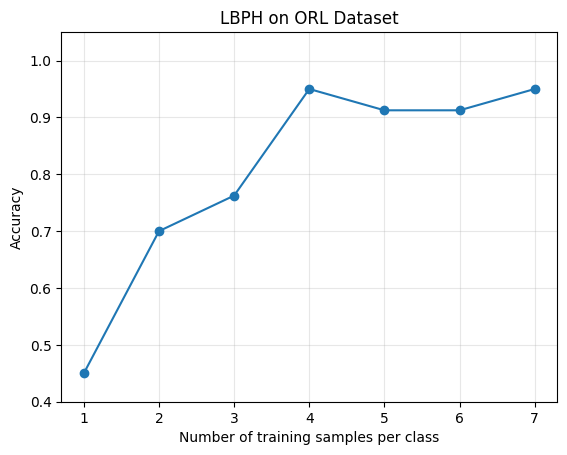

In [19]:
fig = plt.figure()
plt.plot(train_sizes, accuracy_scores.values(), marker="o")
plt.title("LBPH on ORL Dataset")
plt.xlabel("Number of training samples per class")
plt.ylabel("Accuracy")
plt.xticks(train_sizes)
plt.grid(True, alpha=0.3)
plt.ylim(min(accuracy_scores.values()) - 0.05, 1.05)
plt.show()